In [1]:
%matplotlib inline


# Linear Regression Example

This example uses the only the first feature of the `diabetes` dataset, in
order to illustrate a two-dimensional plot of this regression technique. The
straight line can be seen in the plot, showing how linear regression attempts
to draw a straight line that will best minimize the residual sum of squares
between the observed responses in the dataset, and the responses predicted by
the linear approximation.

The coefficients, the residual sum of squares and the variance score are also
calculated.




In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]
len(diabetes_X), diabetes_X[:5]

(442, array([[ 0.06169621],
        [-0.05147406],
        [ 0.04445121],
        [-0.01159501],
        [-0.03638469]]))

In [8]:
diabetes.target[:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

In [7]:
diabetes.data.shape

(442, 10)

In [5]:
diabetes_X.shape

(442, 1)

In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [6]:
type(diabetes)

sklearn.utils.Bunch

In [9]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [10]:
import pandas as pd

In [11]:
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)

In [12]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [13]:
df['sex'].unique()

array([ 0.05068012, -0.04464164])

In [14]:
df['sex'].sum()

5.789813073420191e-14

In [15]:
df['age'].sum()

-1.6087131626818518e-13

In [16]:
df.sum()

age   -1.606354e-13
sex    5.782874e-14
bmi   -3.556044e-13
bp     5.664913e-14
s1    -3.905209e-14
s2     5.865447e-14
s3    -2.021994e-13
s4     1.669567e-13
s5    -1.693238e-13
s6    -1.508494e-13
dtype: float64

In [15]:
(df**2).sum()

age    1.0
sex    1.0
bmi    1.0
bp     1.0
s1     1.0
s2     1.0
s3     1.0
s4     1.0
s5     1.0
s6     1.0
dtype: float64

In [13]:
len(df['age'].unique())

58

In [14]:
df['age'].sum()

-1.6087131626818518e-13

In [11]:
diabetes.data[:10]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087],
       [-0.09269548, -0.04464164, -0.04069594, -0.01944209, -0.06899065,
        -0.07928784,  0.04127682, -0.0763945 , -0.04118039, -0.09634616],
       [-0.04547248,  0.05068012, -0.04716281, -0.01599922, -0.04009564,
        -0.02480001,  0.00077881, -0.03949338

In [16]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [18]:
diabetes_X[:5]

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469]])

In [19]:
diList = list(diabetes_X)
diList[:5]

[array([0.06169621]),
 array([-0.05147406]),
 array([0.04445121]),
 array([-0.01159501]),
 array([-0.03638469])]

In [22]:
diList2 = [el[0] for el in diabetes_X]
diList2[:5]

[0.0616962065186885,
 -0.0514740612388061,
 0.0444512133365941,
 -0.0115950145052127,
 -0.0363846922044735]

In [23]:
diX = pd.Series(diList2)
diX.head()

0    0.061696
1   -0.051474
2    0.044451
3   -0.011595
4   -0.036385
dtype: float64

In [24]:
diX.describe()

count    4.420000e+02
mean    -8.045349e-16
std      4.761905e-02
min     -9.027530e-02
25%     -3.422907e-02
50%     -7.283766e-03
75%      3.124802e-02
max      1.705552e-01
dtype: float64

In [4]:
diabetes_X.mean()

-8.013951493363262e-16

In [20]:
diabetes_X.std()

0.047565149415453895

In [21]:
diabetes_X.max(),diabetes_X.min()

(0.17055522598066, -0.0902752958985185)

In [27]:
# Exercise load https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt

In [22]:
df = pd.read_csv('https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt', sep='\t')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [23]:
df.Y.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: Y, dtype: float64

In [18]:
df.BMI.describe()

count    442.000000
mean      26.375792
std        4.418122
min       18.000000
25%       23.200000
50%       25.700000
75%       29.275000
max       42.200000
Name: BMI, dtype: float64

In [19]:
df['BMI'].describe()

count    442.000000
mean      26.375792
std        4.418122
min       18.000000
25%       23.200000
50%       25.700000
75%       29.275000
max       42.200000
Name: BMI, dtype: float64

In [20]:
df['BMI'][:-20]

0      32.1
1      21.6
2      30.5
3      25.3
4      23.0
5      22.6
6      22.0
7      26.2
8      32.1
9      30.0
10     18.6
11     28.0
12     23.7
13     26.2
14     24.0
15     24.7
16     30.3
17     27.5
18     25.4
19     24.7
20     21.1
21     24.3
22     26.0
23     32.0
24     29.7
25     25.2
26     19.2
27     31.9
28     24.4
29     25.8
       ... 
392    23.6
393    22.1
394    28.1
395    26.5
396    23.5
397    26.0
398    27.8
399    28.5
400    30.6
401    22.2
402    23.3
403    35.4
404    31.4
405    37.8
406    18.9
407    35.0
408    21.7
409    25.3
410    23.8
411    31.8
412    34.3
413    26.3
414    27.0
415    27.2
416    33.8
417    33.0
418    24.1
419    21.3
420    23.0
421    27.9
Name: BMI, Length: 422, dtype: float64

In [24]:
# Split the data into training/testing sets
diabetes_X_train = df['BMI'][:-20]
diabetes_X_test = df['BMI'][-20:]

# Split the targets into training/testing sets
diabetes_y_train = df['Y'][:-20]
diabetes_y_test = df['Y'][-20:]

In [25]:
type(diabetes_X_train)

pandas.core.series.Series

In [27]:
diabetes_X_train[:5]

0    32.1
1    21.6
2    30.5
3    25.3
4    23.0
Name: BMI, dtype: float64

In [32]:
# remember for single feature /column we need to add [[],[],[]]
X = diabetes_X_train.values.reshape(-1,1)
X[:5]

array([[32.1],
       [21.6],
       [30.5],
       [25.3],
       [23. ]])

In [33]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [34]:
# Train the model using the training sets
regr.fit(X, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
# for testing we also need to reshape our answers
X_test = diabetes_X_test.values.reshape(-1,1)
X_test[:5]

array([[33.6],
       [22.7],
       [27.4],
       [22.6],
       [23.2]])

In [36]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(X_test)

In [37]:
# The coefficients
#ax + b   
# a == regr.coef_
print('Coefficients: ', regr.coef_)

Coefficients:  [10.11244095]


In [38]:
#ax + b   
# b == regr.intercept_
regr.intercept_

-113.80477582667424

In [39]:
type(r2_score)

function

In [ ]:
r2_score()

In [40]:
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Mean squared error: 2548.07
Variance score: 0.47


In [43]:
type(diabetes_y_test)

pandas.core.series.Series

TypeError: 'str' object is not callable

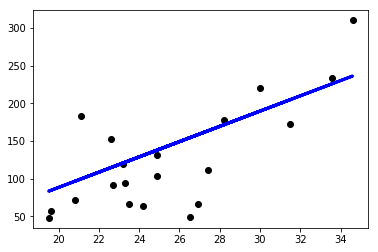

In [44]:
# Plot outputs
plt.scatter(X_test, diabetes_y_test,  color='black')
plt.plot(X_test, diabetes_y_pred, color='blue', linewidth=3)

# plt.xticks(())
plt.xlabel("BMI")
# plt.yticks(())
plt.ylabel("Progress after year")

plt.show()

Automatically created module for IPython interactive environment
Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


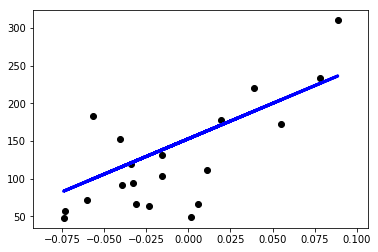

In [46]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

plt.show()

In [48]:
print(max(X))

[42.2]


In [46]:
def plotit(X,y_test,y_pred):
    plt.scatter(X, y_test,  color='black')
    plt.plot(X, y_pred, color='blue', linewidth=3)

    xstep = np.around((max(X)-min(X))/10,decimals=0)
    ystep = np.around((max(y_test)-min(y_test))/10,decimals=-1)
    print(xstep,ystep)
    plt.xticks(np.arange(np.around(min(X), decimals=-1), max(X)+20, xstep))
    plt.yticks(np.arange(np.around(min(y_test), decimals=-1), max(y_test), ystep))

    plt.show()

[0.] 30.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


ValueError: Maximum allowed size exceeded

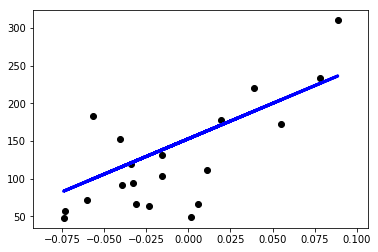

In [47]:
plotit(diabetes_X_test, diabetes_y_test, diabetes_y_pred)

[2.] 30.0


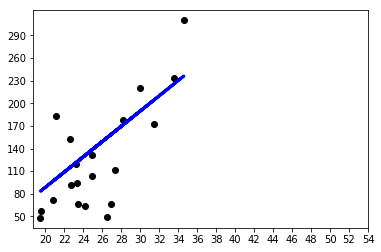

In [49]:
plotit(X_test, diabetes_y_test, diabetes_y_pred)

In [50]:
X_train = df[['BMI', 'BP']][:-20]
X_train.head(),len(X_train)

(    BMI     BP
 0  32.1  101.0
 1  21.6   87.0
 2  30.5   93.0
 3  25.3   84.0
 4  23.0  101.0, 422)

In [51]:
X_test = df[['BMI', 'BP']][-20:]
len(X_test)

20

In [52]:
# Train the model using the training sets
regr.fit(X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
y_pred = regr.predict(X_test)

In [54]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, y_pred))

Coefficients: 
 [8.41957075 1.4120643 ]
Mean squared error: 2582.76
Variance score: 0.47


In [47]:
from sklearn.model_selection import train_test_split

# d_train, d_test = train_test_split(diab, test_size=0.2, random_state=42)

In [48]:
diabetes.data.shape

(442, 10)

In [49]:
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [50]:
df.corr()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [52]:
dfc = df.drop(['SEX'], axis=1)
dfc.head()

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [54]:
dfc_X = dfc.drop(['Y'], axis=1).values
dfc_X[:5]

array([[ 59.    ,  32.1   , 101.    , 157.    ,  93.2   ,  38.    ,
          4.    ,   4.8598,  87.    ],
       [ 48.    ,  21.6   ,  87.    , 183.    , 103.2   ,  70.    ,
          3.    ,   3.8918,  69.    ],
       [ 72.    ,  30.5   ,  93.    , 156.    ,  93.6   ,  41.    ,
          4.    ,   4.6728,  85.    ],
       [ 24.    ,  25.3   ,  84.    , 198.    , 131.4   ,  40.    ,
          5.    ,   4.8903,  89.    ],
       [ 50.    ,  23.    , 101.    , 192.    , 125.4   ,  52.    ,
          4.    ,   4.2905,  80.    ]])

In [57]:
# alternative to filter for all columns except one
dfc_Xb = dfc[[col for col in dfc.columns if col != "Y"]].values
dfc_Xb[:5]

array([[ 59.    ,  32.1   , 101.    , 157.    ,  93.2   ,  38.    ,
          4.    ,   4.8598,  87.    ],
       [ 48.    ,  21.6   ,  87.    , 183.    , 103.2   ,  70.    ,
          3.    ,   3.8918,  69.    ],
       [ 72.    ,  30.5   ,  93.    , 156.    ,  93.6   ,  41.    ,
          4.    ,   4.6728,  85.    ],
       [ 24.    ,  25.3   ,  84.    , 198.    , 131.4   ,  40.    ,
          5.    ,   4.8903,  89.    ],
       [ 50.    ,  23.    , 101.    , 192.    , 125.4   ,  52.    ,
          4.    ,   4.2905,  80.    ]])

In [59]:
# I avoided doing reshape(-1,1)
dfc_y = dfc[['Y']].values
dfc_y[:5]

array([[151],
       [ 75],
       [141],
       [206],
       [135]], dtype=int64)

In [61]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.htmldfc
dfc_X_train, dfc_X_test, dfc_y_train, dfc_y_test = train_test_split(dfc_X, dfc_y, test_size=0.2, random_state=42)

In [62]:
dfc_X_train.shape

(353, 9)

In [63]:
dfc_y_test.shape

(89, 1)

In [64]:
regressor = linear_model.LinearRegression()

In [65]:
regressor.fit(dfc_X_train, dfc_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
regressor.coef_

array([[ 1.26917234e-02,  6.36167037e+00,  1.04738082e+00,
        -1.21713541e+00,  7.99023803e-01,  7.16802185e-01,
         6.76757951e+00,  6.95340398e+01,  1.57661571e-01]])

In [67]:
regressor.intercept_

array([-378.53702408])

In [68]:
dfc_predict = regressor.predict(dfc_X_test)

In [70]:
mean_squared_error(dfc_y_test, dfc_predict)
# # Explained variance score: 1 is perfect prediction
# print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

2986.732922114439

In [71]:
print(f"Variance score: {r2_score(dfc_y_test, dfc_predict)} ")

Variance score: 0.4362688983095516 


In [78]:
# we could test multiple regressor models with this function
def getScore(X, y, regressor=linear_model.LinearRegression(), random_state=43):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    variance = r2_score(y_test, predictions)
    return mse, variance

In [75]:
getScore(dfc_X, dfc_y)

(2986.732922114439, 0.4362688983095516)

In [76]:
getScore(dfc_X, dfc_y, regressor=linear_model.LassoCV())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


(2983.8457394159554, 0.4368138397977399)

In [77]:
getScore(dfc_X, dfc_y, regressor=linear_model.LassoLars(alpha=.1))

(2895.701112788389, 0.4534507031439522)